In [4]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


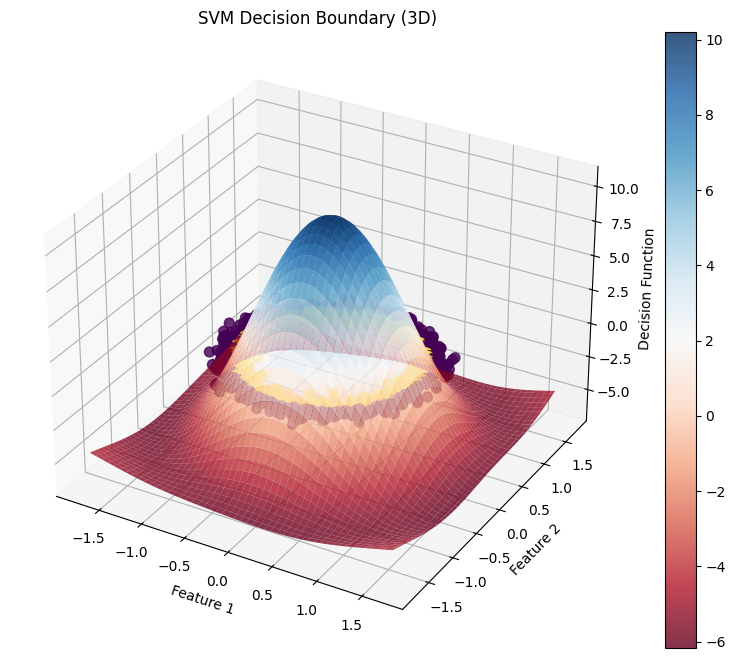

Model Accuracy: 0.9660


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

def generate_circular_data(n_samples=1000, noise=0.1):
    np.random.seed(42)
    r = np.random.normal(1, noise, n_samples)
    theta = np.random.uniform(0, 2*np.pi, n_samples)

    X1 = r * np.cos(theta)
    X2 = r * np.sin(theta)
    X = np.column_stack([X1, X2])
    y = (np.sqrt(X1**2 + X2**2) <= 1).astype(int)

    return X, y

# Generate and prepare data
X, y = generate_circular_data()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train SVM
svm = SVC(kernel='rbf')
svm.fit(X_scaled, y)

# Create mesh grid
margin = 0.5
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                    np.linspace(y_min, y_max, 100))

# Calculate decision function
X_mesh = np.c_[xx.ravel(), yy.ravel()]
X_mesh_scaled = scaler.transform(X_mesh)
Z = svm.decision_function(X_mesh_scaled)
Z = Z.reshape(xx.shape)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot decision surface
surf = ax.plot_surface(xx, yy, Z, cmap='RdBu', alpha=0.8)

# Plot training points
scatter = ax.scatter(X[:, 0], X[:, 1], np.zeros_like(y),
                    c=y, cmap='viridis', s=50, alpha=0.8)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Decision Function')
ax.set_title('SVM Decision Boundary (3D)')

# Add colorbar
fig.colorbar(surf)

plt.show()

# Print accuracy
accuracy = svm.score(X_scaled, y)
print(f'Model Accuracy: {accuracy:.4f}')